In [ ]:
import time #calculate runtime
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import sys

In [ ]:
"""
# record start time
start = time.time()

#code segment
print("Hello, World")

end = time.time() # record end time

# print the difference between start and end time in ms
print("The time of execution of above program is :", (end-start) * 10**3, "ms")

"""

'\n# record start time\nstart = time.time()\n\n#code segment\nprint("Hello, World")\n\nend = time.time() # record end time\n\n# print the difference between start and end time in ms\nprint("The time of execution of above program is :", (end-start) * 10**3, "ms")\n\n'

Insertion Sort

In [ ]:
def insertionSort(array):
  comparisons = 0
  for i in range(1, len(array)):
    key = array[i]
    j = i - 1

    while j >= 0 and array[j] > key:
      comparisons += 1
      array[j + 1] = array[j]
      j -= 1

    array[j + 1] = key
  return comparisons



Merge Sort

In [ ]:
def mergeSort(array, comparisons=0):
    if len(array) <= 1:
        return array, comparisons

    mid = len(array) // 2
    left, comparisons_left = mergeSort(array[:mid], comparisons)
    right, comparisons_right = mergeSort(array[mid:], comparisons)

    result, comparisons = merge(left, right, comparisons_left + comparisons_right)

    return result, comparisons

def merge(left, right, comparisons):
    result = []
    i, j = 0, 0

    while i < len(left) and j < len(right):
        comparisons += 1
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result += left[i:]
    result += right[j:]

    return result, comparisons
    '''
    if len(arr) <= 1: #if rch limit size return
        return arr

    else:
        mid = len(arr) // 2 #find middle point
        left = arr[:mid]    #split left
        right = arr[mid:]   #split right

        mergeSort(left)  #mergesort left side
        mergeSort(right) #mergesort right side

        i = j = k = 0       #i:iterate left, j: iterate right, k: iterate arr

        while i < len(left) and j < len(right): #while both not iterated through
            if left[i] < right[j]:  #if left smaller than right
                arr[k] = left[i]    #put into array
                i += 1              #iterate
            else:                   #same for right
                arr[k] = right[j]
                j += 1

            k += 1  #

        #one of the sides no more
        while i < len(left):  #put rest in array
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right): #put rest in array
            arr[k] = right[j]
            j += 1
            k += 1
        '''

Hybrid Sort

In [ ]:
def hybridSort(arr, S,  comparisons=0):
      if len(arr) <= S: #if rch limit size, use insertion
        insertionCom = insertionSort(arr)
        return arr, comparisons+insertionCom

      mid = len(arr) // 2
      left, comparisons_left = hybridSort(arr[:mid], S, comparisons,)
      right, comparisons_right = hybridSort(arr[mid:], S, comparisons)

      result, comparisons = merge(left, right, comparisons_left + comparisons_right)

      return result, comparisons



test

In [ ]:

def run_sort(dataset, S):
    #Generate a dataset with 10 million integers (adjust as needed)

    start = time.time()

    #code segment
    newarr = []
    com = 0
    newarr, com = hybridSort(dataset, S)

    end = time.time() # record end time

    # print the difference betwen start and end time in ms
    #print("The time of execution of above program is :", (end-start) * 10**3, "ms")
    #print(newarr)
    #print(com)

    return com

In [ ]:
def plots(var, comparisons, check):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    count = 0
    if check == "N":
      plt.title('Number of Key Comparisons (log10) vs. List Size (log10)')
      plt.xlabel('List Size (log10)')
      for comparison in comparisons:
        plt.plot(var, np.log10(np.array(comparisons[comparison])), marker='o', linestyle='-', color=colors[count % 8], label = "S = " + comparison)
        count += 1
    else:
      plt.title('Number of Key Comparisons (log10) vs. S value')
      plt.xlabel('S Value')
      for comparison in comparisons:
        plt.plot(var, np.log10(np.array(comparisons[comparison])), marker='o', linestyle='-', color=colors[count % 8], label = "N = " + comparison)
        count += 1
    plt.ylabel('Number of Comparisons (log10)')
    plt.grid(True)
    plt.rcParams['legend.loc'] = 'best'
    plt.legend(loc='upper right')
    # plt.yticks(range(min(comparisons[]), max(comparisons) + 1))
    # plt.xticks(range(min(var), max(var) + 1))
    plt.show()

In [ ]:
def plot_complex(x, y, INP, fixed):
  # Best case:  N+Nlog(N/S)
  # Worst case: NS + Nlog(N/S)
  worst = []
  best = []
  if fixed == "S": # if S is fixed
    for N, time in zip(x, y):
        worst.append(INP*N + N * math.log10(N/INP))
    for N, time in zip(x, y):
        best.append(N + N* math.log10(N/INP))
    plt.xlabel('Datasize (log10)')
    plt.title('Key Comparisons against Datasize (S = {})'.format(INP))
    x = np.array(np.log10(x))
  else:
    for S, time in zip(x, y):
        worst.append(INP * S + INP * math.log10(INP/S))
    for S, time in zip(x, y):
        best.append(INP + INP * math.log10(INP/S))
    plt.xlabel('S value')
    plt.title('Key Comparisons against S value (N = {})'.format(INP))
  plt.plot(x, np.array(np.log10(y)), marker='o', color='b', label='Empirical Results')
  plt.plot(x, np.array(np.log10(worst)), marker='o', color='r', label='Worst Case / Average Case')
  plt.plot(x, np.array(np.log10(best)), marker='o', color='y', label='Best Case')
  plt.ylabel('Key Comparisons (log10)')
  plt.legend(loc='upper right')
  plt.show()

S = 10, N = 100, Comparisons : 486, Execution Time: 0.0003859996795654297 seconds
S = 10, N = 1000, Comparisons : 8521, Execution Time: 0.007448911666870117 seconds
S = 10, N = 10000, Comparisons : 119951, Execution Time: 0.1067802906036377 seconds
S = 10, N = 100000, Comparisons : 1498495, Execution Time: 1.6450004577636719 seconds
S = 10, N = 1000000, Comparisons : 18424347, Execution Time: 10.735012531280518 seconds
S = 10, N = 10000000, Comparisons : 219439720, Execution Time: 104.48431921005249 seconds
S = 30, N = 100, Comparisons : 715, Execution Time: 0.0012531280517578125 seconds
S = 30, N = 1000, Comparisons : 9655, Execution Time: 0.0027947425842285156 seconds
S = 30, N = 10000, Comparisons : 134808, Execution Time: 0.044818878173828125 seconds
S = 30, N = 100000, Comparisons : 1779181, Execution Time: 0.572230339050293 seconds
S = 30, N = 1000000, Comparisons : 20774537, Execution Time: 8.367481231689453 seconds
S = 30, N = 10000000, Comparisons : 234184989, Execution Time: 

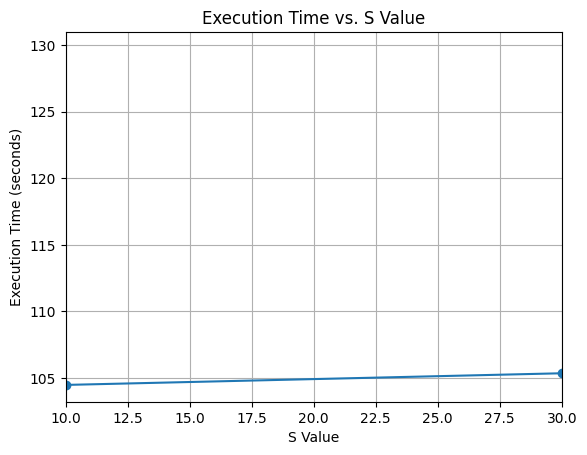

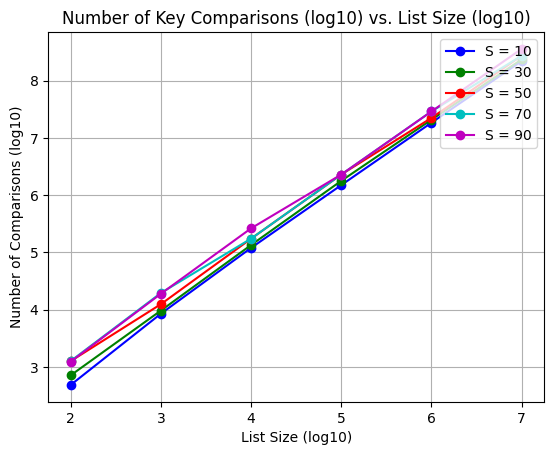

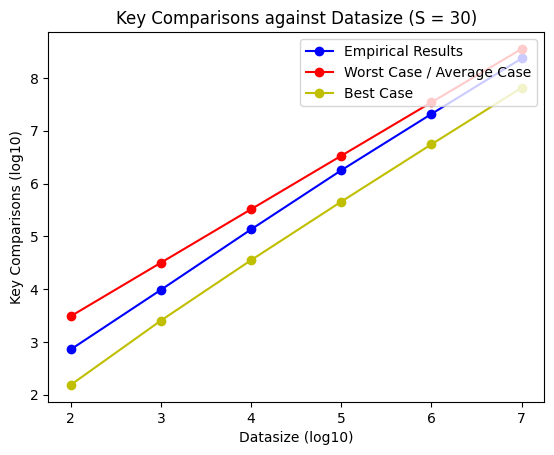

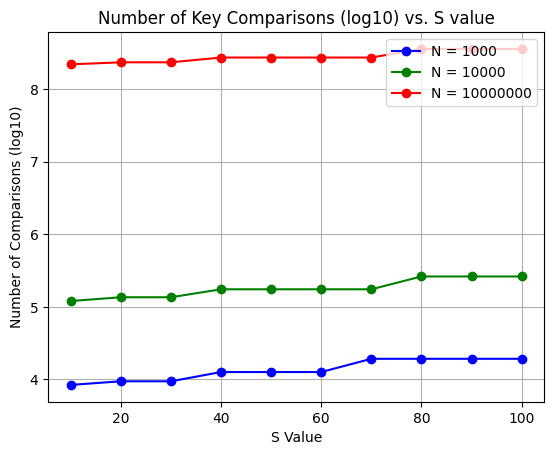

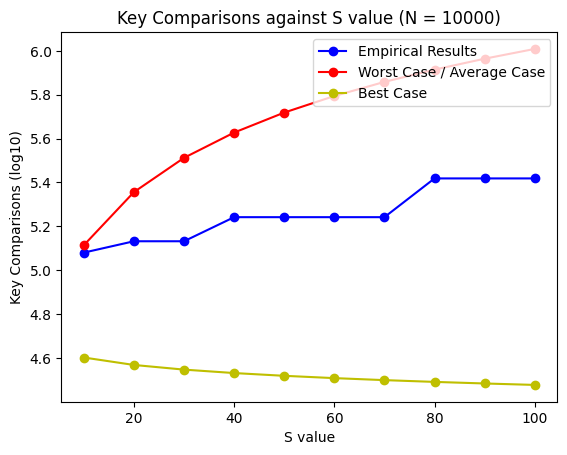

In [ ]:
def main():
    timeplt = {}
    # varying n, S fixed
    datasizes = [100, 1000, 10000, 100000, 1000000, 10000000]
    # datasizes = [5, 50, 100, 200]
    s_values = list(range(10, 110, 20))
    # s_values = [30]
    s_value = list(range(0,))
    total_N = {}
    execution_times = []
    for s_value in s_values:  # Make graphs of KC vs N with different S values
      comparisons_N = []
      for datasize in datasizes:
        dataset = [random.randint(1, datasize) for _ in range(datasize)]
        #compare with optimal S
        start_time = time.time()
        comparisons = run_sort(dataset, s_value)
        end_time = time.time()
        execution_time = end_time - start_time

        print(f"S = {s_value}, N = {datasize}, Comparisons : {comparisons}, Execution Time: {execution_time} seconds")

        comparisons_N.append(comparisons)

      total_N[str(s_value)] = comparisons_N
      execution_times.append(execution_time)

    plt.plot(s_values, execution_times, marker='o', linestyle='-')
    plt.xlabel('S Value')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time vs. S Value')
    plt.grid(True)
    plt.xlim(10,30)
    plt.show()

    plots(np.log10(np.array(datasizes)),total_N, "N") # log10 values of comparisons and datasizes for better graph output
    plot_complex(datasizes, total_N["30"], 30, "S")

    # varying S, n fixed
    datasizes = [1000, 10000, 10000000]
    # datasizes = [5, 50, 100, 200]
    s_values = list(range(10, 110, 10))
    total_S = {}
    for datasize in datasizes:  # Make graphs of KC vs S with different N values
      dataset = [random.randint(1, datasize) for _ in range(datasize)]
      comparisons_S = []
      times = []
      for s_value in s_values:
        comparisons_S.append(run_sort(dataset, s_value))
      total_S[str(datasize)] = comparisons_S
    plots(s_values, total_S, "S")
    plot_complex(s_values, total_S["10000"], 10000, "N")


if __name__ == "__main__":
    main()